<a href="https://colab.research.google.com/github/Vijayalakshmiboya/Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas


🔹 Elastic Net Regression Performance
Mean Squared Error (MSE): 5737909.2751348475
R² Score: 0.7903323238966551


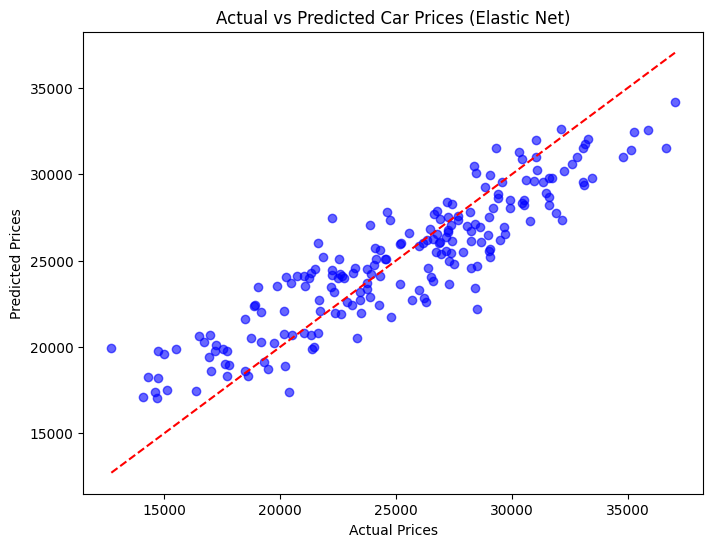

In [4]:
# 📌 Car Price Prediction using Elastic Net Regression (User CSV Input)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Read dataset
file_path = '/content/Car_Price_Prediction.csv'  # Your dataset path
df = pd.read_csv(file_path)

# Step 2: Encode categorical features
categorical_cols = ["Make", "Model", "Fuel Type", "Transmission"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Split features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Elastic Net Regression
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train_scaled, y_train)
y_pred = elastic_net.predict(X_test_scaled)

# Step 7: Evaluation
print("🔹 Elastic Net Regression Performance")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices (Elastic Net)")
plt.show()
